Q1a:

MySql Statement:

select e1.name as EmployeeName <br/>
from Employee as e1, Employee as e2 <br/>
where e1.manager_id = e2.id AND e1.Salary > e2.Salary <br/>
<br/>

Explanation: 

Selecting the name will output the employee's name and selecting from 2 tables will get the Cartesian Product of these 2 tables. The 2 conditions in the where clause is used to filter for the names of employees whose salaries are greater than their immediate manager's. 

Q1b:

Use python pandas to load Employee table <br/>
<br/>
To find out employees who do not manage anyone, filter out the NULL values in the manager_id col first and check the values in the manager_id col against the values in the id col. For the values in the manager_id col that appeared in the id col, it means that the employee with that specific id manages someone. For the remaining id values, we can sum up their corresponding salary and divide by the count to get the average salary.

Q2:

In [13]:
def exists(v):
    try:
        v
    except NameError:
        return False # v is not defined since there is NameError
    else:
        return True # v is defined


Q3:

In [9]:
import math
def pascalLayer(n):
    
    def binomialCoeff(line, i): # each entry in a layer is a value of a Binomial Coefficient which can be computed using combinations formula
        return math.comb(line, i) # line represents the layer and i represents the entry position in the layer
    
    for line in range(0, n):  # iterate through each layer and print the entries in each layer
        for i in range(0, line + 1): # number of values in each layer is equal to the layer number
            print(binomialCoeff(line, i), " ", end = "")
        print()

pascalLayer(4)

1  
1  1  
1  2  1  
1  3  3  1  


Q4:

Value at Risk, or VaR, is a threshold with a given confidence level that losses will not (or more accurately, will not historically) exceed a certain level. <br/>
<br/>
Conditional Value at Risk, or CVaR, is an estimate of expected losses sustained in the worst 1 - x% of scenarios.

[*********************100%***********************]  7 of 7 completed


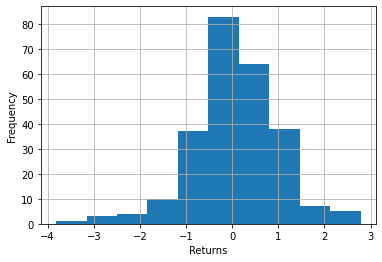

-1.5445851444704413
-2.2091078471798555


In [63]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q4a)

# Data fetching
tickers = ['AAPL', 'IBM', 'GOOG', 'BP', 'XOM', 'COST', 'GS']
df = yf.download(tickers, "2016-01-01", "2016-12-31") # downloading data for all stocks in portfolio
df = df[["Adj Close"]] # only Adjusted Close col for each stock is required to calculate returns
returns_df = pd.DataFrame(df["Adj Close"].pct_change()) # returns is calculated by finding the percentage change
returns_df = returns_df * 100 # convert to percentages
returns_df = returns_df.dropna() # drop rows with na values
#print(returns_df.head())

weights = [0.15, 0.2, 0.2, 0.15, 0.1, 0.15, 0.05] # multiple stocks with different weights
portfolio = (weights * returns_df.values).sum(axis = 1) # for each day, each weight is multiplied by its return and then summed up to get daily portfolio return
plt.hist(portfolio)
plt.xlabel('Returns')
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

VaR_95 = np.percentile(portfolio, 5, interpolation= "lower")
# since we have 252 trading days, so 5% of 252 is 12.6. Hence, we want the 13th lowest return
print(VaR_95) # 95% certain that losses will not exceed -1.54% in a given day based on historical values.

CVaR_95 = portfolio[portfolio <= VaR_95].mean()
print(CVaR_95) # In the worst 5% of cases, losses were on average exceed -2.21% historically.





Q5:

In [ ]:
# a)




Q6:

In [10]:
import datefinder

contents = 0
with open('Q6.txt') as f: # opening txt file and reading its contents
    contents = f.read()
    f.close()

matches = datefinder.find_dates(contents) # using datefinder library to find any date appearances in the contents

counter = 0
for match in matches: 
    counter += 1  # count the total number of date appearances

print(counter)

5
